## 题 1


- 对[车队司机数据](data/fleet_driver_dataset.csv)进行 `K-平均聚类分析`
    - 预知聚类数取为 4
    - 绘制聚类散点图（含聚类中心）

In [3]:
%pylab inline
import IPython

import sklearn as sk
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

Populating the interactive namespace from numpy and matplotlib


### 导入数据

In [17]:
fleet_driver_data_df = pd.read_csv('data/fleet_driver_dataset.csv', sep="\t")
fleet_driver_data_df.tail()

,Driver_ID,Distance_Feature,Speeding_Feature
3995,3423310685,160.04,10.0
3996,3423312600,176.17,5.0
3997,3423312921,170.91,12.0
3998,3423313630,176.14,5.0
3999,3423311533,168.03,9.0


### 生成K-means对象

In [8]:
from sklearn import cluster
# 预知聚类数取为 4
km = cluster.KMeans(init='k-means++', n_clusters=4, random_state=42)#预知聚类数取为 4

### 标准化数据

In [36]:
df = fleet_driver_data_df.copy()
del df['Driver_ID']
data=np.array(df)
from sklearn.preprocessing import scale
data = scale(data)

### 开始聚类分析

In [40]:
km.fit(data)

KMeans(n_clusters=4, random_state=42)

### 绘制聚类散点图（含聚类中心）

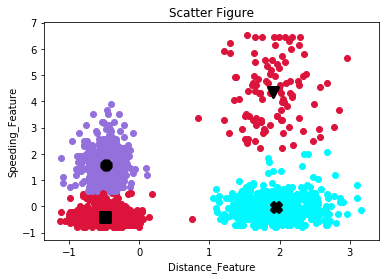

In [61]:
color_list=['#DC143C','#9370DB','#DC143C','#00F8FF']
marker_list=['v','8','s','X']
for i in range(len(km.labels_)):
    plt.scatter(data[i][0], 
                data[i][1],
                color=color_list[km.labels_[i]])
for j in range(len(km.cluster_centers_)):
    plt.scatter(km.cluster_centers_[j][0], 
                km.cluster_centers_[j][1],
               marker=marker_list[j],s=100,linewidths=3,
               color='black')
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.title('Scatter Figure');